# <span style=color:green> Exploring Malaria Deaths Data With A Choropleth Map </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry 
import geopandas as gpd

#### <span style= "color:blue"> After reading in the dataset for malaria deaths, I did a quick check of the first 5 and last 5 rows of the data. I also did a quick check on the unique countries involved in this research. </span>

In [2]:
df = pd.read_csv("malaria_deaths.csv")
df.head()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472


In [3]:
df.tail()

,Entity,Code,Year,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046
6155,Zimbabwe,ZWE,2016,9.507309


In [4]:
df.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa',
       'Andean Latin America', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Caribbean',
       'Central African Republic', 'Central Asia', 'Central Europe',
       'Central Latin America', 'Central Sub-Saharan Africa', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia', 'Eastern Europe',
       'Eastern Sub-Saharan Africa', 'Ecuador', 'E

#### <span style= "color:blue"> Then I check the data type of the columns and realized that data type for Year column should be string instead of integer. I changed it to the correct data type and ran a description of the information of the dataset. <>\span>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6156 non-null   object 
 1   Code                                                                              5292 non-null   object 
 2   Year                                                                              6156 non-null   int64  
 3   Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)  6156 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.5+ KB


In [6]:
#Change Year Dtype from integer to string
df['Year'] = df['Year'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 4 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6156 non-null   object 
 1   Code                                                                              5292 non-null   object 
 2   Year                                                                              6156 non-null   object 
 3   Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)  6156 non-null   float64
dtypes: float64(1), object(3)
memory usage: 192.5+ KB


####  <span style= "color:blue"> From the described info below about the dataset, I can see quickly the number of entries, the mean number of deaths worldwide, the 25-50-75 percentile and the maximum death rate in the dataset. </span>

In [8]:
# only for int64 & float64
df.describe()

,"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)"
count,6156.000000
mean,16.375074
std,38.606219
min,0.000000
25%,0.000000
50%,0.020219
75%,3.891035
max,229.228881


#### <span style= "color:blue"> I changed a column name to match with another dataframe to facilite merging later on. </span>

In [9]:
#Change column name 'Entity' to 'country'
df = df.rename(columns = {'Entity':'country', 'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)': 'Cases'})

In [10]:
df

,country,Code,Year,Cases
0,Afghanistan,AFG,1990,6.802930
1,Afghanistan,AFG,1991,6.973494
2,Afghanistan,AFG,1992,6.989882
3,Afghanistan,AFG,1993,7.088983
4,Afghanistan,AFG,1994,7.392472
...,...,...,...,...
6151,Zimbabwe,ZWE,2012,9.751727
6152,Zimbabwe,ZWE,2013,9.419939
6153,Zimbabwe,ZWE,2014,9.487453
6154,Zimbabwe,ZWE,2015,9.440046


#### <span style= "color:blue"> I was curious about the land where Tarzan came from so I decided to check out Tanzania. I also realized that data are from year 1990 to year 2016.</span> 

In [11]:
df_tz = df.loc[df['country'] == 'Tanzania']

In [12]:
df_tz

,country,Code,Year,Cases
5400,Tanzania,TZA,1990,88.240867
5401,Tanzania,TZA,1991,88.267539
5402,Tanzania,TZA,1992,86.702360
5403,Tanzania,TZA,1993,86.278040
5404,Tanzania,TZA,1994,86.967968
5405,Tanzania,TZA,1995,88.436555
5406,Tanzania,TZA,1996,90.741815
5407,Tanzania,TZA,1997,92.611843
5408,Tanzania,TZA,1998,96.087349
5409,Tanzania,TZA,1999,98.013787


#### <span style= "color:blue"> I am curious about developments over those years and decided to plot a barchat for a glance. Looks like Year 2000 and 2001 were the peak for malaria deaths in Tanzania. </span> 

In [13]:
x = df_tz.Year.tolist()
print(x)

['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [14]:
y = df_tz['Cases'].tolist()
print(y)

[88.2408666756, 88.26753897009999, 86.7023599518, 86.2780403682, 86.9679683857, 88.4365551257, 90.7418147573, 92.6118425933, 96.0873488093, 98.013786656, 99.0343474831, 98.9314914062, 95.0300651812, 81.2788810183, 67.1007695628, 60.8633217154, 50.1153786985, 38.4345697013, 32.9993175137, 35.683071535, 38.7543836667, 32.4818778589, 26.0677364545, 25.330095628, 26.8529715832, 27.1461106731, 26.3695449019]


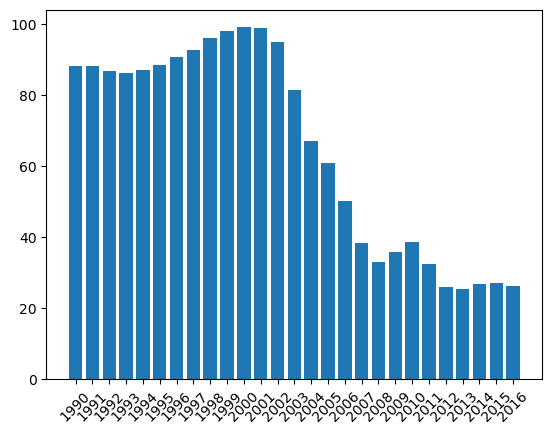

Looks like Year 2000 & 2001 were malaria peak years for Tanzania.


In [15]:
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()
print("Looks like Year 2000 & 2001 were malaria peak years for Tanzania.")

#### <span style= "color:blue"> I was curious about the 5 countries with the top death rate, So i did a sort in descending order on the number of cases. </span>

In [16]:
df.groupby(['country'])['Cases'].max().sort_values(ascending=False)

country
Sierra Leone         229.228881
Uganda               205.391713
Equatorial Guinea    195.436717
Burkina Faso         192.293325
Burundi              183.018389
                        ...    
Macedonia              0.000000
Luxembourg             0.000000
Lithuania              0.000000
Albania                0.000000
Libya                  0.000000
Name: Cases, Length: 228, dtype: float64

In [17]:
df_2016 = df[(df.Year == "2016")]
df_2016

,country,Code,Year,Cases
26,Afghanistan,AFG,2016,7.139429
53,Albania,ALB,2016,0.000000
80,Algeria,DZA,2016,0.021669
107,American Samoa,ASM,2016,0.206802
134,Andean Latin America,NaN,2016,0.047643
...,...,...,...,...
6047,Western Sub-Saharan Africa,NaN,2016,87.537183
6074,World,OWID_WRL,2016,10.203551
6101,Yemen,YEM,2016,0.032792
6128,Zambia,ZMB,2016,29.473210


#### <span style=color:blue> I noticed there were some NaN values in the country code column and filtered them. As these were referring to Regions and not countries, we don't need them for worldmap choropleth plotting. They were then dropped. </span>

In [18]:
#Check for rows with NaN values in Country Code
df_2016[df_2016['Code'].isna()]

,country,Code,Year,Cases
134,Andean Latin America,NaN,2016,0.047643
296,Australasia,NaN,2016,0.000000
998,Caribbean,NaN,2016,0.057987
1052,Central Asia,NaN,2016,0.005663
1079,Central Europe,NaN,2016,0.000000
1106,Central Latin America,NaN,2016,0.052811
1133,Central Sub-Saharan Africa,NaN,2016,64.639528
1619,East Asia,NaN,2016,0.012197
1646,Eastern Europe,NaN,2016,0.000000
1673,Eastern Sub-Saharan Africa,NaN,2016,23.150844


In [19]:
df_2016 = df_2016.dropna()
df_2016[df_2016['Code'].isna()]

,country,Code,Year,Cases


In [20]:
#reset the index of 2016 dataframe
df_2016 = df_2016.reset_index(drop=True)
df_2016

,country,Code,Year,Cases
0,Afghanistan,AFG,2016,7.139429
1,Albania,ALB,2016,0.000000
2,Algeria,DZA,2016,0.021669
3,American Samoa,ASM,2016,0.206802
4,Andorra,AND,2016,0.000000
...,...,...,...,...
191,Vietnam,VNM,2016,1.231405
192,World,OWID_WRL,2016,10.203551
193,Yemen,YEM,2016,0.032792
194,Zambia,ZMB,2016,29.473210


## <span style=color:green> Choropleth plotting for 2016 worldwide death rate below </span>

#### <span style=color:blue> I chose to look at 2016 data because I am only interested in the latest data for now. I need to get 3 dataframes namely, world, location and data for 2016. The merged dataframe will have all the common country name, code and its corresponding long and lat with the shape geometry of the map. Then we use the merged dataframe for plotting. </span>

In [21]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [22]:
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']


In [23]:
# then merge with our data 
merged=pd.merge(world,df_2016,on='Code')
merged.head()

,pop_est,continent,name,Code,gdp_md_est,geometry,country,Year,Cases
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2016,0.000000
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2016,26.369545
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2016,0.000000
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2016,0.000000
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2016,0.000000


In [24]:
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')


In [25]:
#drop useless columns
location = location.drop(['usa_state_code','usa_state_latitude','usa_state_longitude','usa_state'],axis=1)

In [26]:
location.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [27]:
# generate country code  based on country name 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
location['Code']=alpha3code(location.country)
location.head()

,country_code,latitude,longitude,country,Code
0,AD,42.546245,1.601554,Andorra,AND
1,AE,23.424076,53.847818,United Arab Emirates,ARE
2,AF,33.939110,67.709953,Afghanistan,AFG
3,AG,17.060816,-61.796428,Antigua and Barbuda,ATG
4,AI,18.220554,-63.068615,Anguilla,AIA


In [28]:
merged=merged.merge(location,on='country').sort_values(by='Cases',ascending=False).reset_index()
merged

,index,pop_est,continent,name,Code_x,gdp_md_est,geometry,country,Year,Cases,country_code,latitude,longitude,Code_y
0,57,20107509,Africa,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",Burkina Faso,2016,135.088376,BF,12.238333,-1.561593,BFA
1,48,19245344,Africa,Niger,NER,20150.0,"POLYGON ((14.85130 22.86295, 15.09689 21.30852...",Niger,2016,119.229745,NE,17.607789,8.081666,NER
2,56,6163195,Africa,Sierra Leone,SLE,10640.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...",Sierra Leone,2016,118.919917,SL,8.460555,-11.779889,SLE
3,45,17885245,Africa,Mali,MLI,38090.0,"POLYGON ((-11.51394 12.44299, -11.46790 12.754...",Mali,2016,115.833747,ML,17.570692,-3.996166,MLI
4,60,778358,Africa,Eq. Guinea,GNQ,31770.0,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...",Equatorial Guinea,2016,107.395254,GQ,1.650801,10.267895,GNQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,98,3045191,Asia,Armenia,ARM,26300.0,"POLYGON ((46.50572 38.77061, 46.14362 38.74120...",Armenia,2016,0.000000,AM,40.069099,45.038189,ARM
155,97,18028549,Asia,Syria,SYR,50280.0,"POLYGON ((35.71992 32.70919, 35.70080 32.71601...",Syria,2016,0.000000,SY,34.802075,38.996815,None
156,95,5351277,Asia,Turkmenistan,TKM,94720.0,"POLYGON ((52.50246 41.78332, 52.94429 42.11603...",Turkmenistan,2016,0.000000,TM,38.969719,59.556278,TKM
157,94,5789122,Asia,Kyrgyzstan,KGZ,21010.0,"POLYGON ((70.96231 42.26615, 71.18628 42.70429...",Kyrgyzstan,2016,0.000000,KG,41.204380,74.766098,KGZ


### <span style=color:green> My first ever attempt with Choropleth plotting. </span>  

#### <span style=color:blue> There were some missing countries in the map, which I realised after checking through all the dataframes, this could be due to some countries were named differently in each dataframes. This problem can be corrected with some tedious data cleaning later on. </span>

/Users/mattos/opt/anaconda3/envs/Malaria_Dataset_Test/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/mattos/opt/anaconda3/envs/Malaria_Dataset_Test/lib/python3.7/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


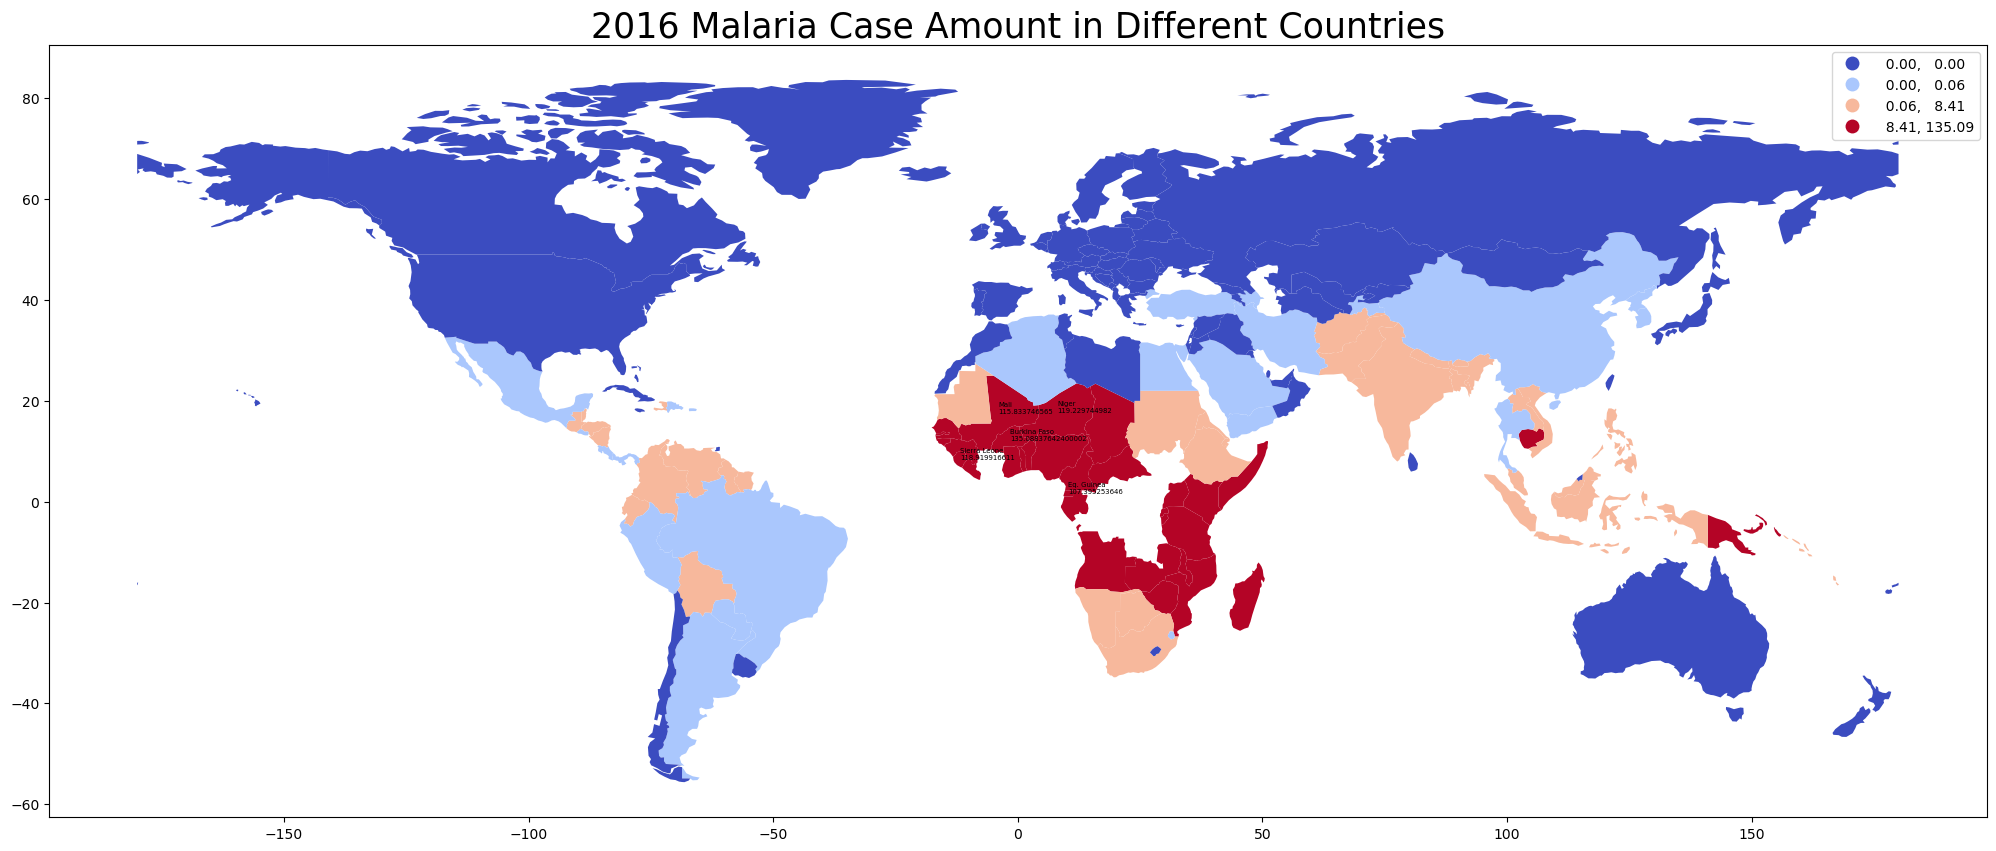

In [29]:
# plot confirmed cases world map 
merged.plot(column='Cases', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm')
plt.title('2016 Malaria Case Amount in Different Countries',fontsize=25)
# add top 5 countries names and numbers
for i in range(0,5):
    plt.text(float(merged.longitude[i]),float(merged.latitude[i]),"{}\n{}".format(merged.name[i],merged.Cases[i]),size=5)
plt.show()

## <span style=color:green> Some Thoughts

#### <span style=color:blue> From a look at the world map, we can quickly see that the high death rate for malaria cases were mostly concentrated in underdeveloped African continent.  </span>

#### <span style= color:blue > We can do more research to find the causes of it. Could it be due to poverty, poor hygiene and very low standard of healthcare? Or could it be these countries were situated near the equator where malaria infected mosquitoes thrived? </span>

#### <span style=color:blue> We might know once we have more corresponding data on more features. </span>